In [1]:
%%capture
!unzip /content/drive/MyDrive/Face_Emotion/Fer2013.zip

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/train'
val_dir = '/content/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])

emotion_model_info = emotion_model.fit(
        train_generator,
        epochs=60,
        validation_data=validation_generator,
        batch_size = 64)

Epoch 1/50
113/113 [==============================] - 7s 50ms/step - loss: 1.8126 - accuracy: 0.2492 - val_loss: 1.8177 - val_accuracy: 0.2579
Epoch 2/50
113/113 [==============================] - 5s 47ms/step - loss: 1.7731 - accuracy: 0.2811 - val_loss: 1.7450 - val_accuracy: 0.3183
Epoch 3/50
113/113 [==============================] - 6s 55ms/step - loss: 1.7056 - accuracy: 0.3306 - val_loss: 1.6537 - val_accuracy: 0.3628
Epoch 4/50
113/113 [==============================] - 5s 42ms/step - loss: 1.6460 - accuracy: 0.3674 - val_loss: 1.6061 - val_accuracy: 0.3877
Epoch 5/50
113/113 [==============================] - 5s 45ms/step - loss: 1.6057 - accuracy: 0.3833 - val_loss: 1.5752 - val_accuracy: 0.4082
Epoch 6/50
113/113 [==============================] - 5s 43ms/step - loss: 1.5736 - accuracy: 0.3950 - val_loss: 1.5313 - val_accuracy: 0.4143
Epoch 7/50
113/113 [==============================] - 6s 53ms/step - loss: 1.5509 - accuracy: 0.4033 - val_loss: 1.4920 - val_accuracy: 0.4412

In [ ]:
emotion_model.save_weights('emotion_model_weights.h5')

In [ ]:
emotion_model.save('emotion_model.h5')

In [ ]:
history = emotion_model_info

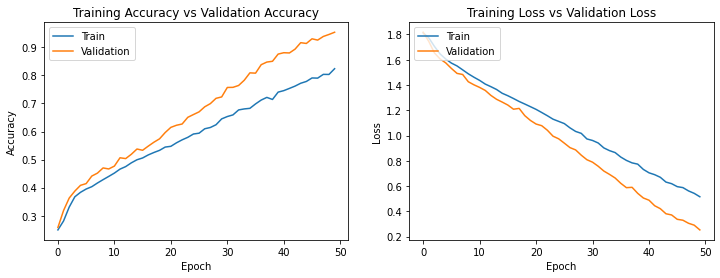

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = emotion_model_info.history['accuracy']
train_loss = emotion_model_info.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(emotion_model_info.history['accuracy'])
ax[0].plot(emotion_model_info.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(emotion_model_info.history['loss'])
ax[1].plot(emotion_model_info.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

(48, 48)


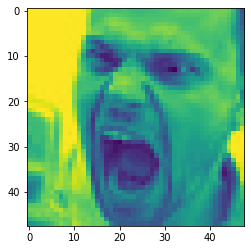

In [ ]:
img = tf.keras.utils.load_img("test.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [ ]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = emotion_model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 0s 366ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Angry


In [ ]:
def build_model():
    input_img = keras.Input(shape=(48,48, 1), name="image")
    x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', name="Conv1")(input_img)
    x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', name="Conv2")(x)
    x = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', name="Conv3")(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool1")(x)
    x = keras.layers.Dropout(0.25)(x)

    x = keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', name="Conv4")(x)
    x = keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', name="Conv5")(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool2")(x)
    x = keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', name="Conv6")(x)
    x = keras.layers.MaxPooling2D((2, 2), name="pool3")(x)
    x = keras.layers.Dropout(0.25)(x)

    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(1024, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Dense(7, activation="softmax", name="dense2")(x)

    model = keras.models.Model(inputs=input_img, outputs=x, name="Face_Emotion")
    opt = keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model

In [ ]:
mymodel = build_model()

In [ ]:
mymodel.summary()

Model: "Face_Emotion"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 48, 48, 1)]       0         
                                                                 
 Conv1 (Conv2D)              (None, 46, 46, 32)        320       
                                                                 
 Conv2 (Conv2D)              (None, 44, 44, 64)        18496     
                                                                 
 Conv3 (Conv2D)              (None, 42, 42, 64)        36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 21, 21, 64)        0         
                                                                 
 dropout_9 (Dropout)         (None, 21, 21, 64)        0         
                                                                 
 Conv4 (Conv2D)              (None, 19, 19, 128)      

In [ ]:
history = mymodel.fit(train_generator, validation_data=validation_generator, epochs=60)

Epoch 1/60
113/113 [==============================] - 10s 70ms/step - loss: 1.8363 - accuracy: 0.2455 - val_loss: 1.8215 - val_accuracy: 0.2471
Epoch 2/60
113/113 [==============================] - 6s 50ms/step - loss: 1.8210 - accuracy: 0.2451 - val_loss: 1.8182 - val_accuracy: 0.2471
Epoch 3/60
113/113 [==============================] - 7s 62ms/step - loss: 1.8099 - accuracy: 0.2481 - val_loss: 1.7844 - val_accuracy: 0.2551
Epoch 4/60
113/113 [==============================] - 5s 48ms/step - loss: 1.7683 - accuracy: 0.2729 - val_loss: 1.7177 - val_accuracy: 0.3129
Epoch 5/60
113/113 [==============================] - 8s 75ms/step - loss: 1.6944 - accuracy: 0.3292 - val_loss: 1.6375 - val_accuracy: 0.3711
Epoch 6/60
113/113 [==============================] - 5s 48ms/step - loss: 1.6360 - accuracy: 0.3626 - val_loss: 1.5715 - val_accuracy: 0.3940
Epoch 7/60
113/113 [==============================] - 6s 56ms/step - loss: 1.5871 - accuracy: 0.3890 - val_loss: 1.5273 - val_accuracy: 0.402

In [ ]:
mymodel.save('emotion_model_new.h5')

In [ ]:
mymodel.save_weights('emotion_model_weights_new.h5')

In [ ]:
prediction_model = keras.models.Model(mymodel.get_layer(name="image").input, mymodel.get_layer(name="dense2").output)

In [ ]:
prediction_model.save('new_emotion_pred.h5')

In [ ]:
temp = keras.models.load_model("/content/new_emotion_pred.h5",compile=False)

In [ ]:
result1 = temp.predict(img)
result1 = list(result1[0])
print(result)

1/1 [==============================] - 0s 286ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
img_index = result1.index(max(result))
print(label_dict[img_index])
plt.show()

Angry


In [ ]:
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history_new.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
import pickle
with open('hist_pick', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
with open('hist_pick', "rb") as file_pi:
    new_history = pickle.load(file_pi)

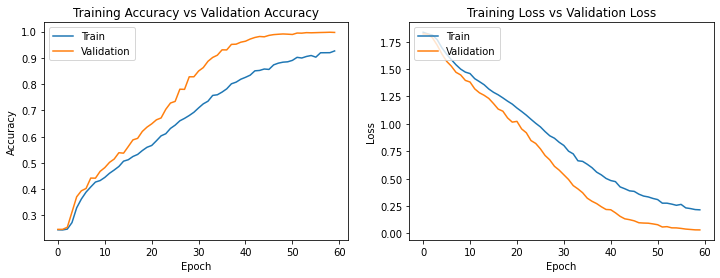

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = new_history['accuracy']
train_loss = new_history['loss']
fig.set_size_inches(12,4)

ax[0].plot(new_history['accuracy'])
ax[0].plot(new_history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(new_history['loss'])
ax[1].plot(new_history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    bounding_box = cv2.CascadeClassifier('/home/shivam/.local/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2gray_frame)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
    cv2.destroyAllWindows()
    break

In [ ]:
import tkinter as tk
from tkinter import *
import cv2
from PIL import Image, ImageTk
import os
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

temp_model = keras.models.load_model("/content/new_emotion_pred.h5",compile=False)

cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "   Angry   ", 1: "Disgusted", 2: "  Fearful  ", 3: "   Happy   ", 4: "  Neutral  ", 5: "    Sad    ", 6: "Surprised"}


emoji_dist={0:"angry.png",2:"disgusted.png",2:"fearful.png",3:"happy.png",4:"neutral.png",5:"sad.png",6:"surpriced.png"}

global last_frame1                                    
last_frame1 = np.zeros((480, 640, 3), dtype=np.uint8)
global cap1
show_text=[0]
def show_vid():      
    cap1 = cv2.VideoCapture(0)                                 
    if not cap1.isOpened():                             
        print("cant open the camera1")
    flag1, frame1 = cap1.read()
    frame1 = cv2.resize(frame1,(600,500))

    bounding_box = cv2.CascadeClassifier('/home/shivam/.local/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame1, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        prediction = emotion_model.predict(cropped_img)
        
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame1, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        show_text[0]=maxindex
    if flag1 is None:
        print ("Major error!")
    elif flag1:
        global last_frame1
        last_frame1 = frame1.copy()
        pic = cv2.cvtColor(last_frame1, cv2.COLOR_BGR2RGB)     
        img = Image.fromarray(pic)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        lmain.after(10, show_vid)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        exit()


def show_vid2():
    frame2=cv2.imread(emoji_dist[show_text[0]])
    pic2=cv2.cvtColor(frame2,cv2.COLOR_BGR2RGB)
    img2=Image.fromarray(frame2)
    imgtk2=ImageTk.PhotoImage(image=img2)
    lmain2.imgtk2=imgtk2
    lmain3.configure(text=emotion_dict[show_text[0]],font=('arial',45,'bold'))
    
    lmain2.configure(image=imgtk2)
    lmain2.after(10, show_vid2)

if __name__ == '__main__':
    root=tk.Tk()   
    img = ImageTk.PhotoImage(Image.open("logo.png"))
    heading = Label(root,image=img,bg='black')
    
    heading.pack() 
    heading2=Label(root,text="Photo to Emoji",pady=20, font=('arial',45,'bold'),bg='black',fg='#CDCDCD')                                 
    
    heading2.pack()
    lmain = tk.Label(master=root,padx=50,bd=10)
    lmain2 = tk.Label(master=root,bd=10)

    lmain3=tk.Label(master=root,bd=10,fg="#CDCDCD",bg='black')
    lmain.pack(side=LEFT)
    lmain.place(x=50,y=250)
    lmain3.pack()
    lmain3.place(x=960,y=250)
    lmain2.pack(side=RIGHT)
    lmain2.place(x=900,y=350)
    
    root.title("Photo To Emoji")            
    root.geometry("1400x900+100+10") 
    root['bg']='black'
    exitbutton = Button(root, text='Quit',fg="red",command=root.destroy,font=('arial',25,'bold')).pack(side = BOTTOM)
    show_vid()
    show_vid2()
    root.mainloop()

TclError: ignored